# Customer Churn from Bank

## Machine Learning Model

🎯 Project Aim: Bank Customer Churn Prediction

1. The goal of this project is to develop a machine learning model that predicts whether a bank customer is likely to leave (churn) based on their profile and account activity.

2. By identifying customers at risk of churn, banks can take targeted actions to improve retention, personalize services, and reduce potential revenue loss.

# Exploratory Data Analysis

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing required sklearn libraries for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,StandardScaler

# sklearn libraries for ModelSelection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# sklearn libraries for metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score

# ignoring the harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Customer_Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Overview of the dataset

In [3]:
# Number of rows and columns
print(f"Dataset consist of {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset consist of 10000 rows and 14 columns.


In [4]:
# Number of Numerical and categorical columns
numeric_count,category_count=0,0
for col in df.columns:
  if df[col].dtype=='O':
    category_count+=1
  else:
    numeric_count+=1

print(f"The dataset has {category_count} category columns and {numeric_count} numeric columns.")

The dataset has 3 category columns and 11 numeric columns.


In [5]:
# Number of Unique Values for Categorical Columns
for col in df.columns:
  if df[col].dtype=='O':
    if df[col].nunique()==1 or df[col].nunique()==df.shape[0]:
      print(f"** {col} Column has {df[col].nunique()} unique columns.**")
    else :
      print(f"{col} Column has {df[col].nunique()} unique columns.")

Surname Column has 2932 unique columns.
Geography Column has 3 unique columns.
Gender Column has 2 unique columns.


In [6]:
# Number of unique values for Numerical Columns
for col in df.columns:
  if df[col].dtype!='O':
    if df[col].nunique()==1 or df[col].nunique()==df.shape[0]:
      print(f"** {col} Column has {df[col].nunique()} unique columns.**")
    else :
      print(f"{col} Column has {df[col].nunique()} unique columns.")

** RowNumber Column has 10000 unique columns.**
** CustomerId Column has 10000 unique columns.**
CreditScore Column has 460 unique columns.
Age Column has 70 unique columns.
Tenure Column has 11 unique columns.
Balance Column has 6382 unique columns.
NumOfProducts Column has 4 unique columns.
HasCrCard Column has 2 unique columns.
IsActiveMember Column has 2 unique columns.
EstimatedSalary Column has 9999 unique columns.
Exited Column has 2 unique columns.


- Surname is PII(Personally Identifiable Information) and it doesn't contribute to the analysis. So this column can be removed.

- RowNumber and CustomerId doesnot contribute to the analysis in the Numerical Variable. So this column can be removed.

# Data Cleaning

In [7]:
# Dropping the columns that are not required
df=df.drop(['Surname','RowNumber','CustomerId'],axis=1)

print("After Dropping :")
numeric_count,category_count=0,0
for col in df.columns:
  if df[col].dtype=='O':
    category_count+=1
  else:
    numeric_count+=1

print(f"The dataset has {category_count} category columns and {numeric_count} numeric columns.")

After Dropping :
The dataset has 2 category columns and 9 numeric columns.


In [8]:
# creating sample data

sample_df=pd.DataFrame({'null_percentage': df.isna().mean()*100,
                        'data_type':df.dtypes})
#concating the data with sample
sample_df=pd.concat([sample_df,df.head(2).T],axis=1)

#renaming the column
sample_df.rename(columns={0:'sample_1',1:'sample_2'},inplace=True)
sample_df

,null_percentage,data_type,sample_1,sample_2
CreditScore,0.0,int64,619,608
Geography,0.0,object,France,Spain
Gender,0.0,object,Female,Female
Age,0.0,int64,42,41
Tenure,0.0,int64,2,1
Balance,0.0,float64,0.0,83807.86
NumOfProducts,0.0,int64,1,1
HasCrCard,0.0,int64,1,0
IsActiveMember,0.0,int64,1,1
EstimatedSalary,0.0,float64,101348.88,112542.58


In [9]:
# Analysing duplicated values

print("The dataset doesnot have duplicate vales." if df.duplicated().sum() == 0 else f"The dataset has {df.duplicated().sum()} duplicated rows.")

The dataset doesnot have duplicate vales.


- There is no null values in the dataset.
- There is no duplicate in the dataset.

# Analysing the Target Variable

- Exited Column

In [10]:
# Unique Values in the Churn Variable
df['Exited'].value_counts(normalize=True)*100

,proportion
Exited,
0,79.63
1,20.37


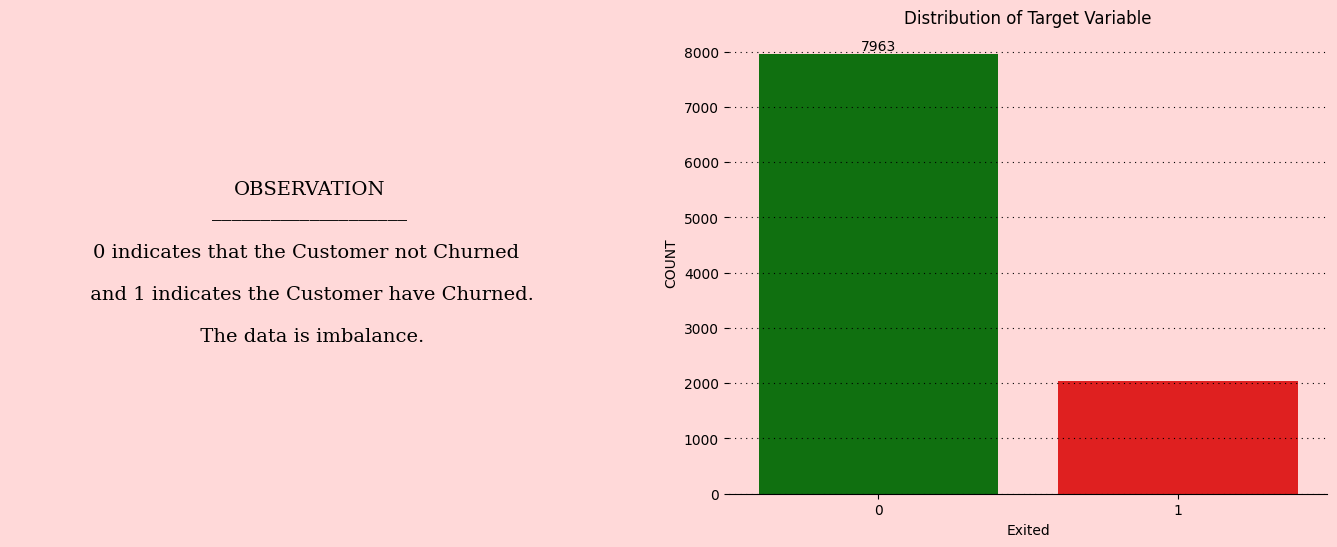

In [11]:
fig=plt.figure(figsize=(17,6))
specs=fig.add_gridspec(1,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])

# adding facecolor to figure
for section in [fig,sec1,sec2]:
  section.set_facecolor("#ffd9d9")

# plotting the graph
ax=sns.countplot(data=df,x='Exited',palette=("green","red"))
ax.bar_label(ax.containers[0])
sec2.set_title("Distribution of Target Variable")
sec2.set_xlabel("Exited")
sec2.set_ylabel("COUNT")
sec2.grid(axis='y',ls=":",dashes=(1,4),color='black')

# Observaation
sec1.text(0.5,0.5,"OBSERVATION\n____________________\n\n\
0 indicates that the Customer not Churned \n\n\
 and 1 indicates the Customer have Churned.\n\n\
 The data is imbalance.",ha='center',va='center',fontfamily='serif',size=14)

# removing the spines and axis
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

for section in [sec1,sec2]:
  for position in ['bottom','left','right','top']:
    if section==sec2 and position=='bottom':
      continue
    else:
      section.spines[position].set_visible(False)

plt.show()

# Univariate Analysis


## Numerical Column

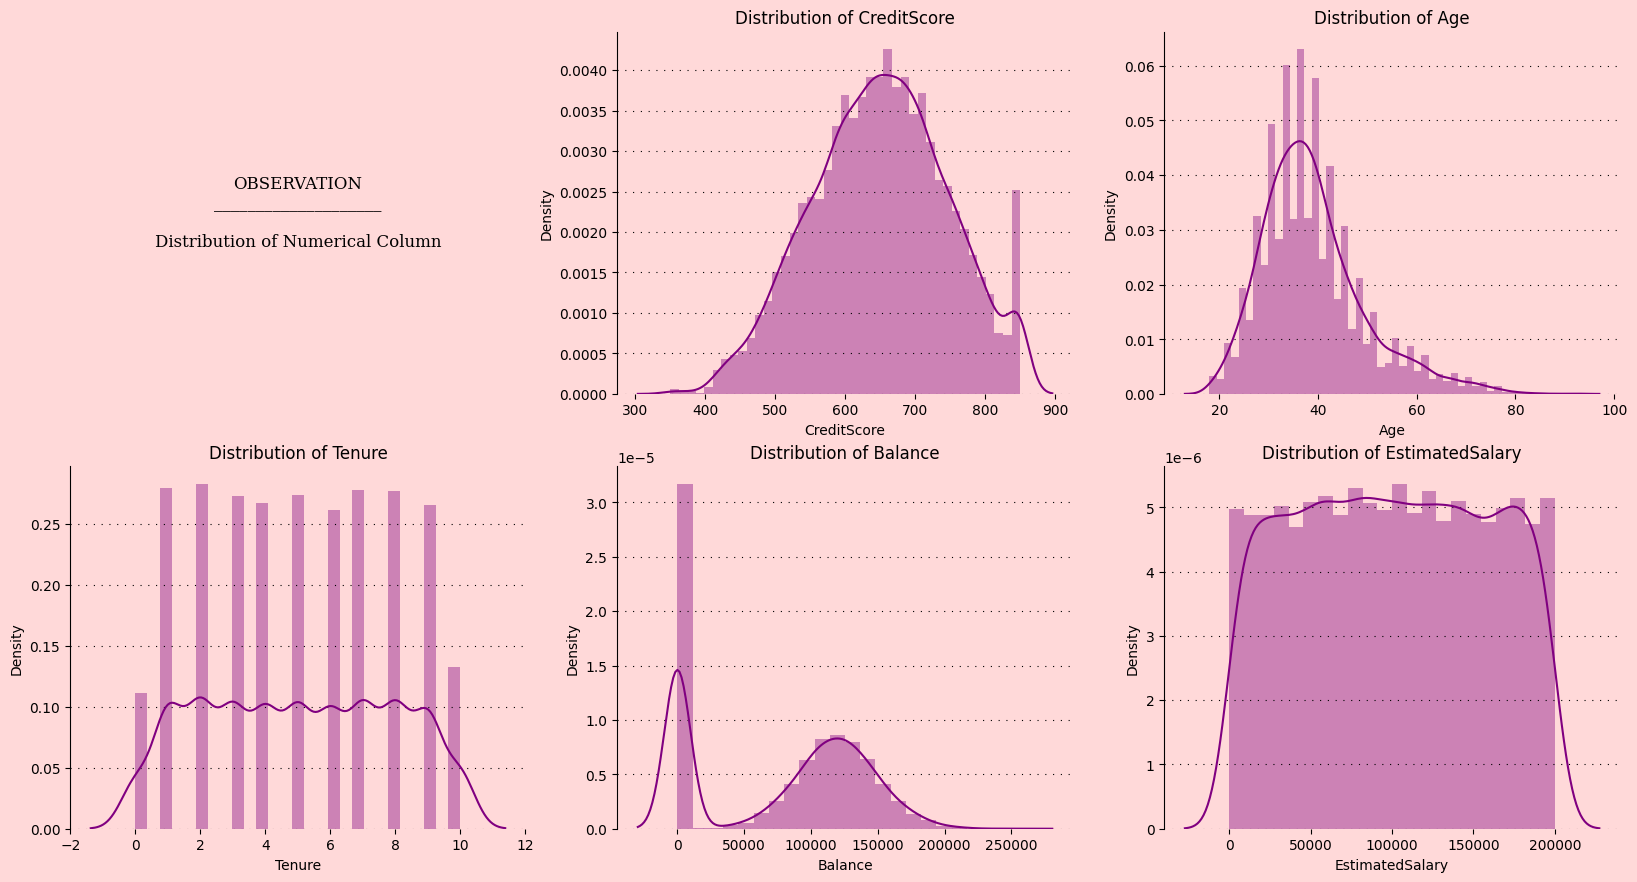

In [12]:
fig=plt.figure(figsize=(20,16))
specs=fig.add_gridspec(3,3)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[0,2])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])

# adding facecolor
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6]:
  sec.set_facecolor("#ffd9d9")

#list of section
section=[sec1,sec2,sec3,sec4,sec5,sec6]

#plotting the graph
cnt=1
for col in df.columns:
  if df[col].dtype!='O' and col!='Exited' and df[col].nunique()>5:
    sns.distplot(df[col],ax=section[cnt],color='purple')
    section[cnt].set_title(f"Distribution of {col}")
    section[cnt].grid(axis='y',ls=":",dashes=(1,6),color='black')
    cnt+=1
# Observation
sec1.text(0.5,0.5,f"OBSERVATION\n____________________\n\n\
Distribution of Numerical Column",ha='center',va='center',fontfamily='serif',size=12)

#removing axis and spines
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)
for sec in section:
  for position in ['bottom','left','right','top']:
    if sec != sec1 and position=='left':
      continue
    else:
      sec.spines[position].set_visible(False)

plt.show()

## Categorical_Column


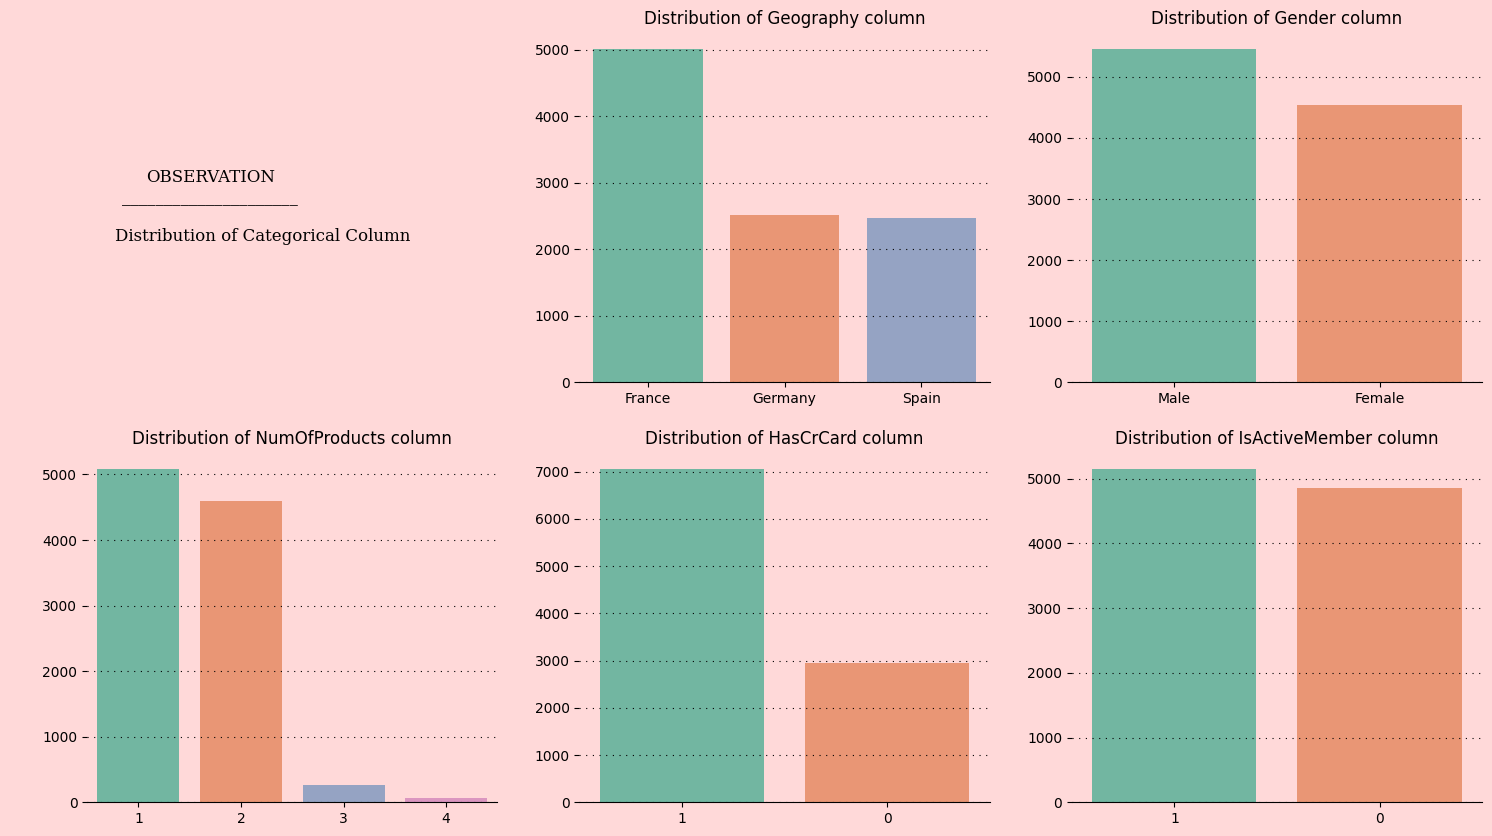

In [13]:
fig=plt.figure(figsize=(18,10))
specs=fig.add_gridspec(2,3)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[0,2])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])

#adding facecolor
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6]:
  sec.set_facecolor("#ffd9d9")

#list of section
section=[sec1,sec2,sec3,sec4,sec5,sec6]

#plotting graph
cnt=1
for col in df.columns:
  if df[col].nunique()<5 and col!='Exited':
    sns.countplot(data=df,x=col,ax=section[cnt],palette="Set2",order=df[col].value_counts().index)
    section[cnt].set_xlabel("")
    section[cnt].set_ylabel("")
    section[cnt].set_title(f"Distribution of {col} column")
    section[cnt].grid(axis='y',ls=":",dashes=(1,5),color='black')
    cnt+=1

# Observation
sec1.text(0.3,0.5,f"OBSERVATION\n_____________________\n\n\
                    Distribution of Categorical Column",
                    ha='center',va="center",size=12,fontfamily='serif')

# removing spines from plot
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)
for sec in section:
  for position in ['bottom','left','right','top']:
    if sec != sec1 and position=='bottom':
      continue
    else :
      sec.spines[position].set_visible(False)

plt.show()

## OBSERVATION FROM UNIVARIATE ANALYSIS

- The average value of creditscore is 650 and distribution of creditscore below the average is more.
- The customer between the age 30 to 50 count is more.
- In terms of tenure, the count of customer's bond for 0 or 10 years of duration is less.
- The count of customer's having above average balance is low.
- There are even customers with 0 Balance and their count of customer is also more.
- The average salary of the customer is 100000 and maximum is around 200000. This column is equally distributed.
- The customer from france is almost 50% more while compared to the customers in other each countries.
- The count of male is around 10% greater than female customer.
- The customer with creditcard count is more.
- The count of Active and Inactive customer is approximately equal.Not much difference between customers.
- Number of Products refers to the service offered by the bank, the count of customers with 1 or 2 service is more.

- Outliers
 - There is present of outliers in CreditScore and Age Column.

# BIVARIATE ANALYSIS

In [14]:
# estimated salary vs balance

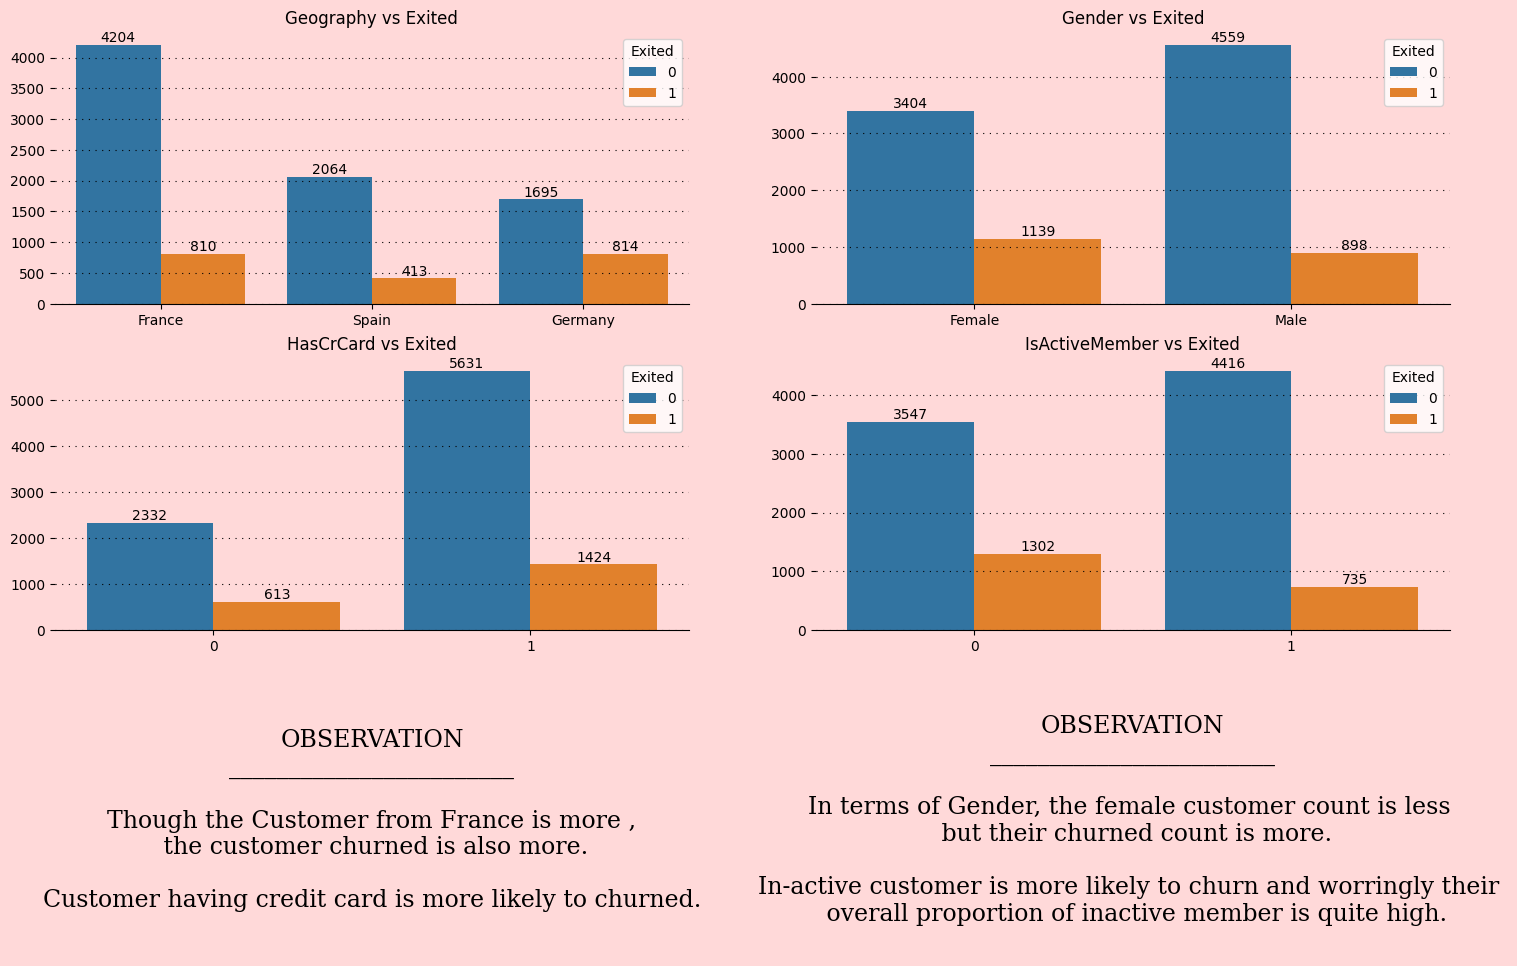

In [15]:
# Distribution of Categorical Column with Target variable
fig=plt.figure(figsize=(18,12))
specs=fig.add_gridspec(3,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[1,0])
sec4=fig.add_subplot(specs[1,1])
sec5=fig.add_subplot(specs[2,0])
sec6=fig.add_subplot(specs[2,1])

#adding face color
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6]:
  sec.set_facecolor("#ffd9d9")

#list of section
section=[sec1,sec2,sec3,sec4,sec5,sec6]

# plotting the distribution
cnt=0
for col in df.columns:
  if df[col].nunique()<4 and col!='Exited':
    ax=sns.countplot(data=df,x=col,hue='Exited',ax=section[cnt])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    section[cnt].set_ylabel("")
    section[cnt].set_xlabel("")
    section[cnt].set_title(f"{col} vs Exited")
    section[cnt].grid(axis='y',ls=":",dashes=(1,5),color='black')
    cnt+=1

# Observation
sec5.text(0.5,0.5,f"OBSERVATION\n________________________\n\n\
Though the Customer from France is more ,\n the customer churned is also more.\n\n\
Customer having credit card is more likely to churned.",ha='center',va='center',size=17,fontfamily='serif')

# Observation
sec6.text(0.5,0.5,f"OBSERVATION\n________________________\n\n\
In terms of Gender, the female customer count is less \n but their churned count is more.\n\n\
In-active customer is more likely to churn and worringly their \n overall proportion of inactive member is quite high.",ha='center',va='center',size=17,fontfamily='serif')
#removing axis and spines
sec5.xaxis.set_visible(False)
sec5.yaxis.set_visible(False)
sec6.xaxis.set_visible(False)
sec6.yaxis.set_visible(False)

for sec in section:
  for position in ['bottom','left','right','top']:
    if sec not in [sec5,sec6] and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)

plt.show()

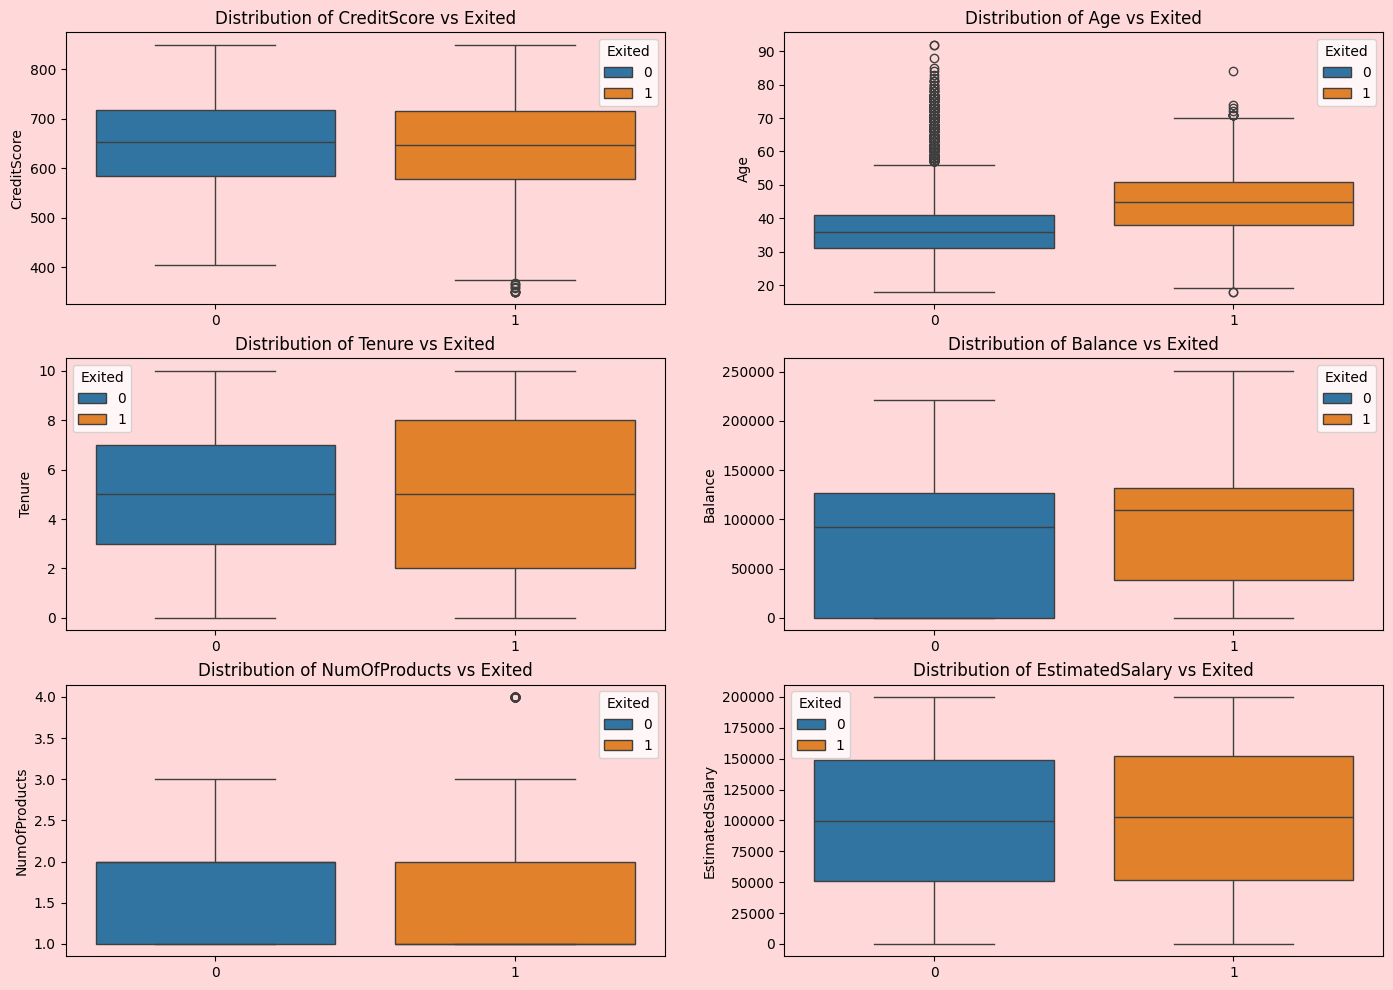

In [16]:
# Distribution of Other Numerical Features with respect to Target Variable
fig=plt.figure(figsize=(17,12))
specs=fig.add_gridspec(3,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[1,0])
sec4=fig.add_subplot(specs[1,1])
sec5=fig.add_subplot(specs[2,0])
sec6=fig.add_subplot(specs[2,1])


#adding facecolor
for section in [fig,sec1,sec2,sec3,sec4,sec5,sec6]:
  section.set_facecolor("#ffd9d9")

#list of section
sec=[sec1,sec2,sec3,sec4,sec5,sec6]

#Distribution of other Features vs Target Variable
cnt=0
for col in df.columns:
  if col!='Exited' and df[col].dtype!='O' and df[col].nunique()>=4:
    sns.boxplot(data=df,y=col,x='Exited',hue='Exited',ax=sec[cnt])
    sec[cnt].set_title(f"Distribution of {col} vs Exited")
    sec[cnt].set_xlabel("")
    cnt+=1

plt.show()

#MULTIVARIATE ANALYSIS

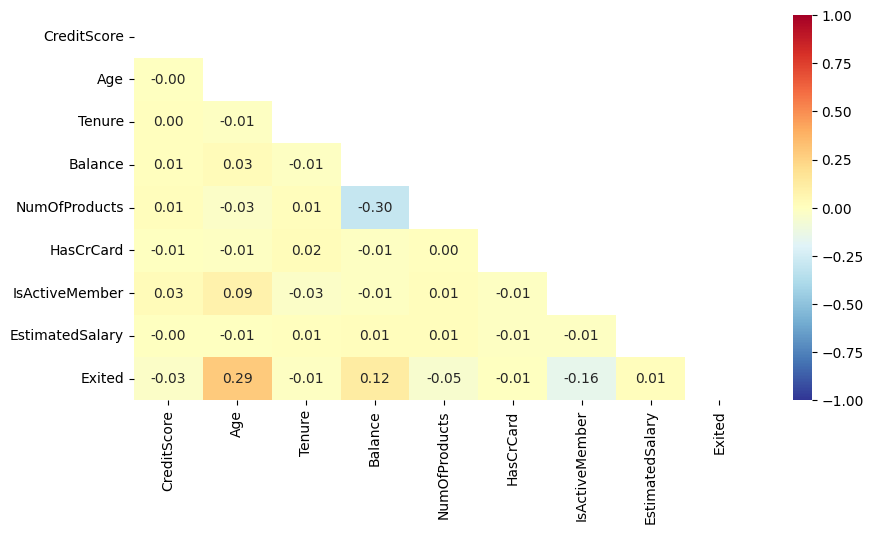

In [17]:
# Finding the corelation between numerical columns

cor=df.corr(numeric_only=True)

upper=np.triu(cor)

# heatmap to view correlation visually
plt.figure(figsize=(10,5))
sns.heatmap(cor,
            cmap='RdYlBu_r',
            mask=upper,
            vmin=-1,vmax=1,annot=True,fmt='.2f')
plt.show()

## OBSERVATION FROM MULTIVARIATE

- We could clearly see that only few features are corelated with each other.
- Age feature is more positively correlated with each other, So more older customer churning possibility is more.
- More the service or product the customer take less the balance they have in account.
- There is a possibility that the customer with more balance are likely to churn more.

## OBSERVATION

- Though the customer's count from France is more, the customer churned is also more in count.
- In terms of Gender, the count of female customer is less but their churned count is more.
- Customer having credit card is more likely to be churned.
- In-Active Customer is more likely to churn and worringly their overall proportion of inactive member is quite high.
- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
- With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- Neither the product nor the salary has a significant effect on the likelihood to churn.

# Outlier Treatment

In [18]:
# Treating outlier for all numerical columns

for col in df.columns:
  if df[col].dtype!='O' and col !='Exited':
    quantile1=df[col].quantile(0.25)
    quantile3=df[col].quantile(0.75)
    iqr=quantile3-quantile1

    # calculating lower_fence and upper_fence using iqr method
    lower_fence=quantile1 - 1.5 * iqr
    upper_fence=quantile3 + 1.5 * iqr

    df[col]=df[col].clip(lower=lower_fence,upper=upper_fence)

# Preprocessing

## train test split

In [19]:
# extracting dependent and independent features
x=df.iloc[:,:-1]
y=df['Exited']

# train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

## Encoding

In [20]:
# extracting all categorical columns
category_columns=[col for col in x_train.columns if x_train[col].dtype=='O']

encoder={}

# training data
for col in category_columns:
  encoder[col]=LabelEncoder()
  x_train[col]=encoder[col].fit_transform(x_train[col])

# testing data
for col in category_columns:
  x_test[col]=encoder[col].transform(x_test[col])

## Balancing the Target Variables

In [21]:
# Balancing the target variable so no bias present in the model
smote=SMOTE(random_state=42)
balanced_xtrain,balanced_ytrain=smote.fit_resample(x_train,y_train)

In [22]:
balanced_ytrain.value_counts()

,count
Exited,
1,5972
0,5972


## Scaling the data for Logistic Regression

In [23]:
# testing dataset
scaler=StandardScaler()
scaled_xtrain=scaler.fit_transform(x_train)

# training dataset
scaled_xtest=scaler.transform(x_test)

# Model Selection

In [24]:
# function that prints the score for the CV Model
def model_score(model):
  print("Best Model Score :")
  print(model.best_score_,"\n")
  print("Best Model Parameters :")
  print(model.best_params_,"\n")
  print("Best Model Estimator :")
  print(model.best_estimator_)


## RandomForestClassifier

### HyperParameter Tuning

In [25]:
# GridSearchCV to find the optimum paraeter for the model

# model
RFmodel=RandomForestClassifier(random_state=42,n_jobs=-1)

# hyper parameters
parameters={'criterion':['entropy','gini','log_loss'],
            'max_features':['sqrt', 'log2', 1,3,6,7,8,9],
            'max_depth': [3, 5, 6, 7, 8],
            'n_estimators':[30,50,100],
            'min_samples_split': [3, 5, 6, 7]}

#implementing GridSearchCV
RFcv_model=GridSearchCV(estimator=RFmodel,
                        param_grid=parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

#Model fit
RFcv_model.fit(x_train,y_train)
print("Random Forest Hyper-Parameter Tuning","\n")
#Calling method to view the score
model_score(RFcv_model)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Random Forest Hyper-Parameter Tuning 

Best Model Score :
0.8570666666666668 

Best Model Parameters :
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 30} 

Best Model Estimator :
RandomForestClassifier(criterion='entropy', max_depth=8, max_features=8,
                       min_samples_split=3, n_estimators=30, n_jobs=-1,
                       random_state=42)


In [26]:
# finding the oob_error for a range of trees

RFbest_parameters=RFcv_model.best_params_
RFmodel=RandomForestClassifier(**RFbest_parameters,n_jobs=-1)

# Setting the parameters
RFmodel.set_params(oob_score=True,warm_start=True)

# list to store thr oob_error
oob_error=[]

# Looping through range of trees
for tree in range(20,50):
  RFmodel.set_params(n_estimators=tree)
  RFmodel.fit(x_train,y_train)
  oob_error.append(1-RFmodel.oob_score_)

RFmodel.set_params(oob_score=False,warm_start=False)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=8,
                       min_samples_split=3, n_estimators=49, n_jobs=-1)

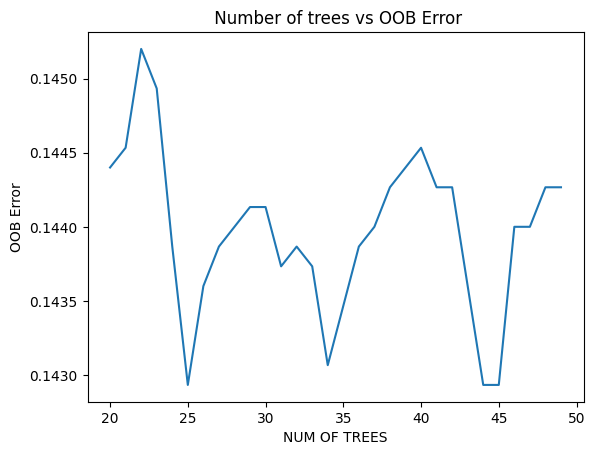

In [27]:
# plotting the graph to view the oob_error vs it's corresponding trees
plt.plot(range(20,50),oob_error)
plt.xlabel("NUM OF TREES")
plt.ylabel("OOB Error")
plt.title(" Number of trees vs OOB Error")
plt.show()

## Logistic Regression

### Hyper Parameter Tuning

In [28]:
# GridSearchCV to find the optimum paraeter for the model

# model
LGmodel=LogisticRegression(random_state=42,n_jobs=-1)

# hyper parameters
LGparameters={'penalty':['l2'],
            'tol':[0.00001,0.0001,0.000001],
            'C': [0.1,0.5,1,10,50,100],
            'max_iter': [100,250,300],
            'fit_intercept':[True],
            'intercept_scaling':[1]
}

#implementing GridSearchCV
LGcv_model=GridSearchCV(estimator=LGmodel,
                        param_grid=LGparameters,
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

#Model fit
LGcv_model.fit(x_train,y_train)
print("Logistic Regression Hyper-Parameter Tuning","\n")
#Calling method to view the score
model_score(LGcv_model)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Logistic Regression Hyper-Parameter Tuning 

Best Model Score :
0.8162666666666667 

Best Model Parameters :
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-05} 

Best Model Estimator :
LogisticRegression(C=0.5, max_iter=300, n_jobs=-1, random_state=42, tol=1e-05)


#Final Model for testing Models

## Random forest

In [29]:
RF=RandomForestClassifier(**RFbest_parameters,random_state=42,n_jobs=-1)
RF.fit(x_train,y_train)
print("Training score : ",round(RF.score(x_train,y_train),3))
RFy_pred=RF.predict(x_test)
print("Testing accuracy : ",round(accuracy_score(y_test,RFy_pred),3))

Training score :  0.879
Testing accuracy :  0.864


## Logistic Regression

In [30]:
LGbest_parameters=LGcv_model.best_params_
LG=LogisticRegression(**LGbest_parameters,random_state=42,n_jobs=-1)
LG.fit(x_train,y_train)
print("Training score : ",LG.score(x_train,y_train))
LGy_pred=LG.predict(x_test)
print("Testing accuracy : ",accuracy_score(y_test,LGy_pred))

Training score :  0.8149333333333333
Testing accuracy :  0.814


# Classification Report

## Random Forest

In [31]:
# Classification report for Random Forest
print("Random Forest")
print(classification_report(y_test,RFy_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.78      0.46      0.58       509

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500



## Logistic Regression

In [32]:
# Classification report for Logistic Regression
print("Logistic Regression")
print(classification_report(y_test,LGy_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.65      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.74      0.58      0.59      2500
weighted avg       0.79      0.81      0.77      2500



# ROC_CURVE

## Random Forest

In [33]:
# roc_auc_score
print("Random Forest")
RFy_proba=RF.predict_proba(x_test)[:,1]
RFroc_auc_score=roc_auc_score(y_test,RFy_proba)
print("roc_auc Score : ",RFroc_auc_score)

RFfpr,RFtpr,thr=roc_curve(y_test,RFy_proba)

Random Forest
roc_auc Score :  0.8586196824807903


## Logistic Regression

In [34]:
# roc_auc_score
print("Logistic Regression")
LGy_proba=LG.predict_proba(x_test)[:,1]
LGroc_auc_score=roc_auc_score(y_test,LGy_proba)
print("roc_auc Score : ",LGroc_auc_score)

LGfpr,LGtpr,thr=roc_curve(y_test,LGy_proba)

Logistic Regression
roc_auc Score :  0.7633121147324058


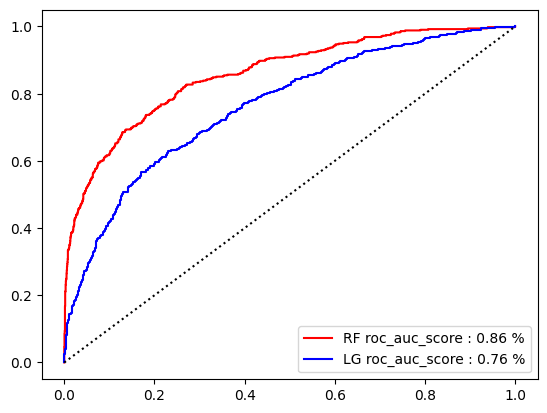

In [35]:
# Graph
plt.plot(RFfpr,RFtpr,color='red',label=f"RF roc_auc_score : {round(RFroc_auc_score,2)} %")
plt.plot(LGfpr,LGtpr,color='blue',label=f"LG roc_auc_score : {round(LGroc_auc_score,2)} %")
plt.plot([0,1],[0,1],color='black',ls=":")
plt.legend()
plt.show()

# CONCLUSION

- From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.
- From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.78, out of all customers that the model thinks will churn and with the recall score of 0.46 on the Random Forest Model.

## The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model.